In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [62]:
print('Hello world!')
import matplotlib.pyplot as plt
%matplotlib inline

Hello world!


In [3]:
import seaborn as sns

In [4]:
# Rading the Datasets
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [5]:
df_train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
# Check for Nans
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df_train.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### Train data cleaning

In [49]:
# Droping the Columns
X_train= df_train.drop(['PassengerId','Name','Ticket','Cabin'],axis = 1)
X_train.Embarked.unique()
embarked_nan = X_train['Embarked'].where(X_train['Pclass']== 1).mode()
X_train['Embarked'] = X_train['Embarked'].fillna(embarked_nan[0])
# embarked_nan[0]

In [50]:
X_train.loc[X_train['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [51]:
# Preprocessing
X_train['Sex'] = X_train['Sex'].map({'male':0,'female':1})
X_train['Embarked'] = X_train['Embarked'].map({'S':0,'C':1,'Q':2})
X_train['Age'] = X_train['Age'].fillna(X_train['Age'].mode()[0])
X_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0
887,1,1,1,19.0,0,0,30.0000,0
888,0,3,1,24.0,1,2,23.4500,0
889,1,1,0,26.0,0,0,30.0000,1


In [11]:
# X_train.dropna(inplace = True)


In [52]:
X_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [53]:
X_train.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object

<AxesSubplot:>

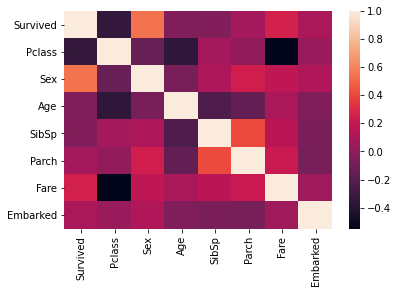

In [54]:
sns.heatmap(X_train.corr())

In [15]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [16]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### Test Data Cleaning

In [17]:
print(f'Mean of Age: {df_test["Age"].mean()}')
print(f'Mode of Age: {df_test["Age"].mode().mean()}')

Mean of Age: 30.272590361445783
Mode of Age: 22.5


##### Just trying somthing different.

In [18]:
X1_test = df_test.copy()
X1_test.loc[X1_test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [19]:
class_ = X1_test.where(X1_test['Pclass'] == 3)
class_
X1_test['Fare'] = X1_test['Fare'].fillna(class_['Fare'].mean())
# X1_test.isnull().sum()

In [20]:
df_test.shape

(418, 11)

In [21]:
X_test= df_test.drop(['PassengerId','Name','Ticket','Cabin'],axis = 1)
X_test['Sex'] = X_test['Sex'].map({'male':0,'female':1})
X_test['Embarked'] = X_test['Embarked'].map({'S':0,'C':1,'Q':2})
X_test['Age'] = X_test['Age'].fillna(X_test['Age'].mode()[0])
# X_test['Fare'] = X_test['Fare'].fillna(X_test['Fare'].mean()) ## Mean of Fare Column
X_test['Fare'] = X_test['Fare'].fillna(class_['Fare'].mean()) ## Class specific Mean
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0
...,...,...,...,...,...,...,...
413,3,0,21.0,0,0,8.0500,0
414,1,1,39.0,0,0,108.9000,1
415,3,0,38.5,0,0,7.2500,0
416,3,0,21.0,0,0,8.0500,0


In [22]:
#X_test.dropna(inplace=True)

In [23]:
X_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [24]:
print(X_train.columns)
X_test.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [25]:
y_train = X_train['Survived']
X_train.drop('Survived', inplace=True, axis=1)

In [26]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaled_X_train = scale.fit_transform(X_train)
scaled_X_test = scale.transform(X_test)

Classification Algorithms

1. Logistic Regression
2. KNN
3. Naive Bayes
4. RandomForest
5. SVM for all kernels

##### RandomForest
*  Test Score: 76

In [27]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=1000,random_state=42)
clf.fit(scaled_X_train,y_train)
ypred = clf.predict(scaled_X_test)
ypred


array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,

##### LogisticRegression
* Test Score: 75

In [28]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42)
clf.fit(scaled_X_train,y_train)


LogisticRegression(random_state=42)

##### KNN  
* Test Score: 73

In [29]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(scaled_X_train,y_train)
y_pred1 = clf.predict(X_test)

In [30]:
y_pred1 = clf.predict(scaled_X_test)

In [31]:
y_pred1.shape

(418,)

In [32]:
df = pd.DataFrame()
df['PassengerId'] = df_test.PassengerId
df['Survived'] = y_pred1
df.to_csv('gender_submission.csv',index= False)

##### NB 
* Test Score: 72

In [33]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
nb_clf.fit(scaled_X_train, y_train)

GaussianNB()

In [34]:
y_pred_NB = nb_clf.predict(X_test)

In [35]:
df = pd.DataFrame()
df['PassengerId'] = df_test.PassengerId
df['Survived'] = y_pred1
df.to_csv('gender_submission.csv',index= False)

##### SVM
 * Test Score: 62.22,       kernel='poly',gamma=0.001,random_state=42
 * Test Score: 76.55,       kernel='linear',gamma=0.001,random_state=42
 * Test Score: 70.57,       kernel='sigmoid',gamma=0.001,random_state=42
 * Test Score: 77.03,       kernel='rbf',gamma=0.001,random_state=42

In [46]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc_clf = SVC(kernel='rbf',gamma=0.001,random_state=42)
svc_clf.fit(scaled_X_train,y_train)
svc_y_pred=svc_clf.predict(scaled_X_test)



In [47]:
df = pd.DataFrame()
df['PassengerId'] = df_test.PassengerId
df['Survived'] = svc_y_pred
df.to_csv('gender_submission.csv',index= False)

In [37]:
#Set parameters
# param_grid = {'gamma':[1,0.1,0.001,0.0001],'C':[1,10,100,1000], 'kernel':['linear','rbf','sigmoid','poly']}
# grid = GridSearchCV(SVC(),param_grid)

In [38]:
#grid.fit(scaled_X_train, y_train)

In [39]:
# from sklearn.decomposition import PCA

# pca = PCA()
# principalComponents = pca.fit_transform()

TypeError: fit_transform() missing 1 required positional argument: 'X'